<a href="https://colab.research.google.com/github/sajivjose174/Project/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statment:

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
!curl -o bike_sharing.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  633k  100  633k    0     0  2647k      0 --:--:-- --:--:-- --:--:-- 2660k


In [ ]:
df_bike_sharing=pd.read_csv('bike_sharing.csv')

#Exploratory Data Analysis:

In [ ]:
df_bike_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Null value detection
df_bike_sharing.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
#defining the shape.
df_bike_sharing.shape

(10886, 12)

In [ ]:
#data info
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#data statistics:
df_bike_sharing.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Unique Values
for i in df_bike_sharing.columns:
  print (f"{i}:", df_bike_sharing[i].nunique())

datetime: 10886
season: 4
holiday: 2
workingday: 2
weather: 4
temp: 49
atemp: 60
humidity: 89
windspeed: 28
casual: 309
registered: 731
count: 822


In [ ]:
# Value counts
for i in df_bike_sharing.columns:
  print (f"{i}:", df_bike_sharing[i].value_counts())

datetime: datetime
2012-12-19 23:00:00    1
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
                      ..
2011-01-01 10:00:00    1
2011-01-01 09:00:00    1
2011-01-01 08:00:00    1
2011-01-01 07:00:00    1
2011-01-01 06:00:00    1
Name: count, Length: 10886, dtype: int64
season: season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
holiday: holiday
0    10575
1      311
Name: count, dtype: int64
workingday: workingday
1    7412
0    3474
Name: count, dtype: int64
weather: weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
temp: temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80

#Graphical Analysis:

In [ ]:
df_bike_sharing.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


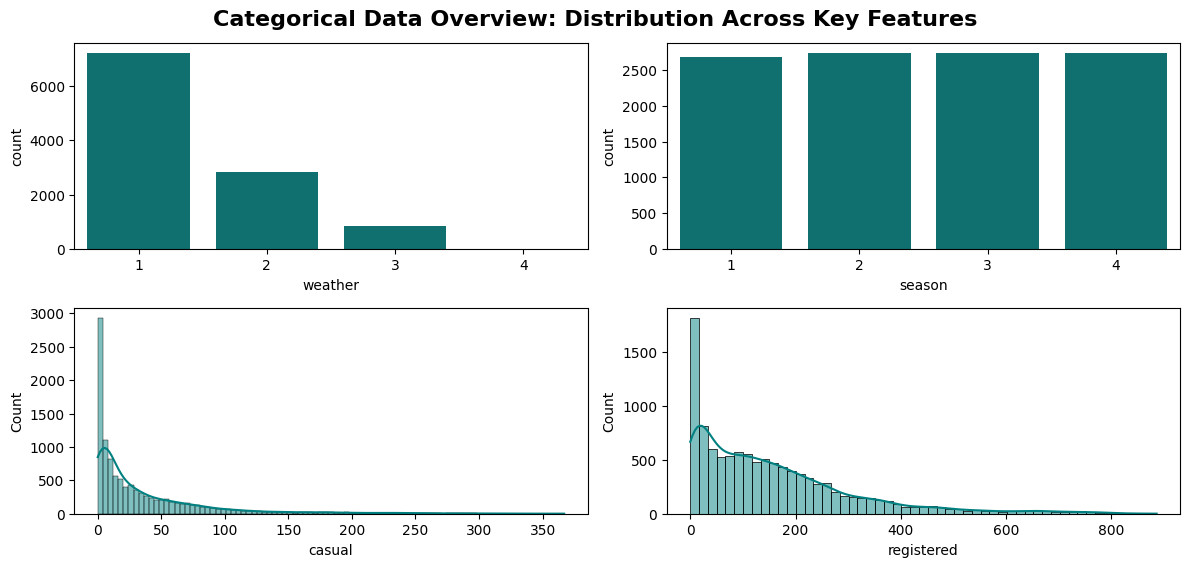

In [ ]:
#Categorical Data Overview: Distribution Across Key Features (covers all the needed barplots,histogram from the dataset):

plt.figure(figsize=(12,8))
#1. weather barplots
plt.subplot(3,2,1)
sns.countplot(df_bike_sharing,x=df_bike_sharing['weather'],color='Teal')

#2. season barplots
plt.subplot(3,2,2)
sns.countplot(data=df_bike_sharing, x='season', color='Teal')

#3.casual histogram
plt.subplot(3,2,3)
sns.histplot(df_bike_sharing,x=df_bike_sharing['casual'],color='Teal',kde=True)

#4.registered histogram
plt.subplot(3,2,4)
sns.histplot(df_bike_sharing,x=df_bike_sharing['registered'],color='Teal',kde=True)


plt.suptitle("Categorical Data Overview: Distribution Across Key Features", fontsize=16, fontweight='bold')
plt.tight_layout()

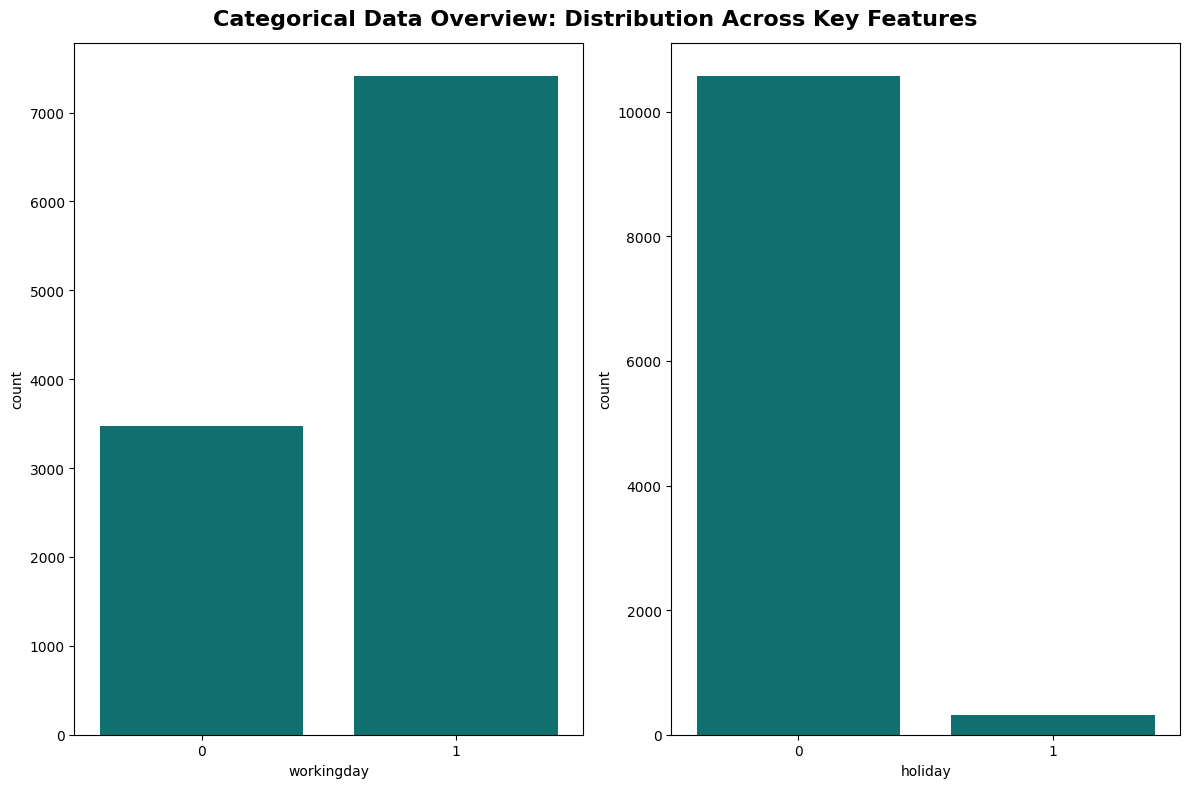

In [ ]:
#Categorical Data Overview: Distribution Across Key Features (covers all the needed barplots,histogram from the dataset):
#1. Workingday barplots
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.countplot(data=df_bike_sharing, x='workingday', color='Teal')

#2.Holiday barplots
plt.subplot(1,2,2)
sns.countplot(data=df_bike_sharing, x='holiday', color='Teal')
plt.suptitle("Categorical Data Overview: Distribution Across Key Features", fontsize=16, fontweight='bold')
plt.tight_layout()

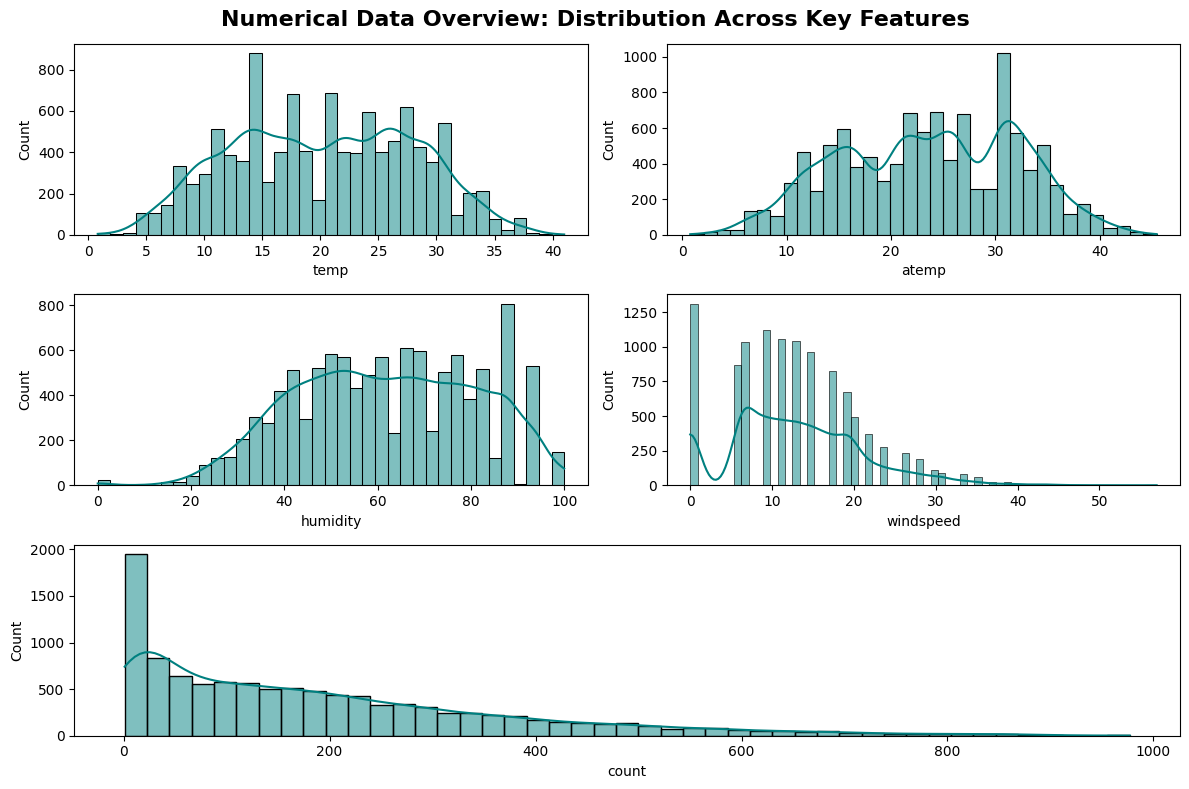

In [ ]:
#Numerical Data Overview: Distribution Across Key Feature

plt.figure(figsize=(12,8))
#1. Temp
plt.subplot(3,2,1)
sns.histplot(df_bike_sharing,x=df_bike_sharing['temp'],color='Teal',kde=True)

#2. ATEmp
plt.subplot(3,2,2)
sns.histplot(data=df_bike_sharing, x='atemp', color='Teal',kde=True)

#3. Humidity
plt.subplot(3,2,3)
sns.histplot(df_bike_sharing,x=df_bike_sharing['humidity'],color='Teal',kde=True)

#4. Windspeed
plt.subplot(3,2,4)
sns.histplot(df_bike_sharing,x=df_bike_sharing['windspeed'],color='Teal',kde=True)

#5. Count
plt.subplot(3,2,(5,6))
sns.histplot(df_bike_sharing,x=df_bike_sharing['count'],color='Teal',kde=True)

plt.suptitle("Numerical Data Overview: Distribution Across Key Features", fontsize=16, fontweight='bold')
plt.tight_layout()

<ipython-input-181-87311da63aee>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


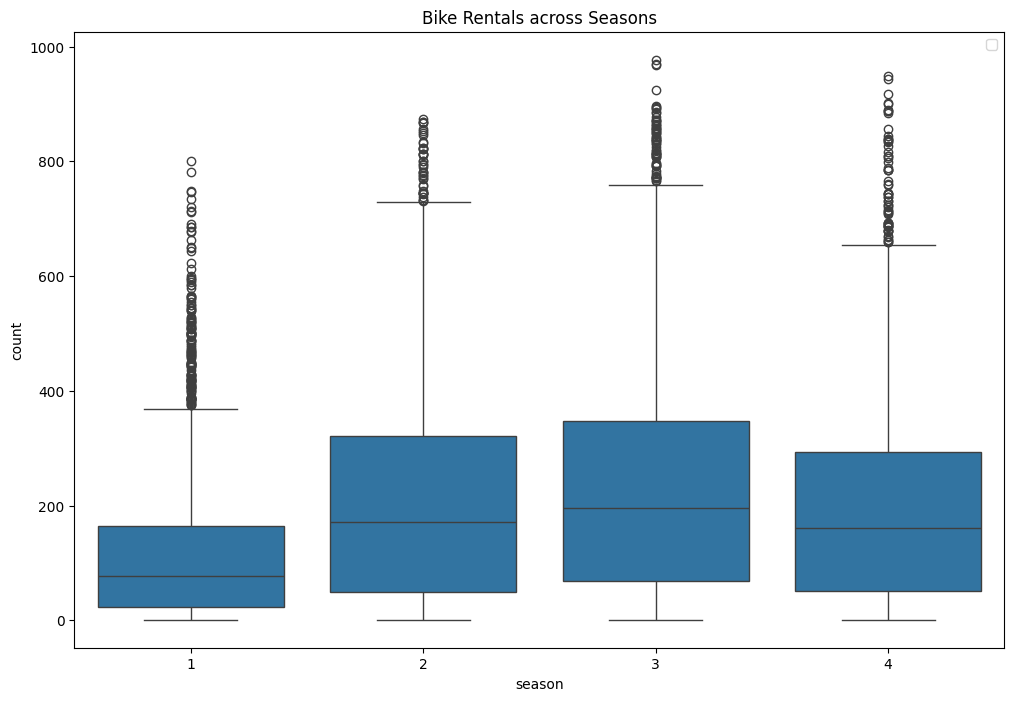

In [ ]:
#outlier checks: Bivariate Analysis

plt.figure(figsize=(12,8))
plt.title("Bike Rentals across Seasons")
sns.boxplot(df_bike_sharing,x='season',y='count')
plt.legend(loc='best')

<ipython-input-182-2afefe7a1b4c>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


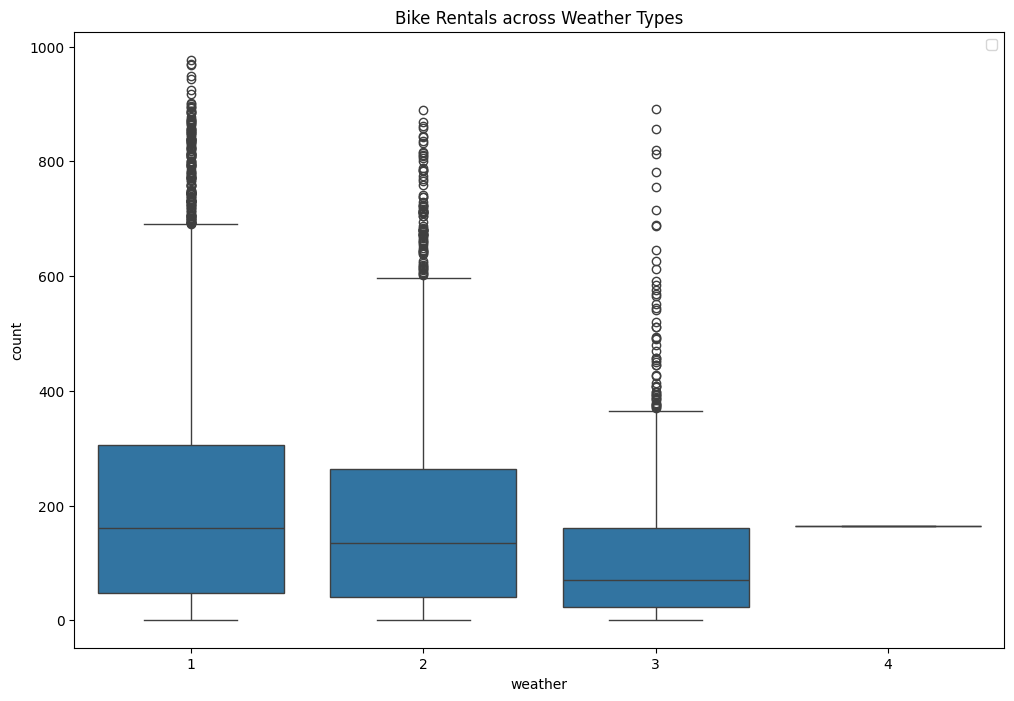

In [ ]:
#outlier checks: Bivariate Analysis

plt.figure(figsize=(12,8))
plt.title("Bike Rentals across Weather Types")
sns.boxplot(df_bike_sharing,x='weather',y='count')
plt.legend(loc='best')

<ipython-input-183-e5747888c0c3>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


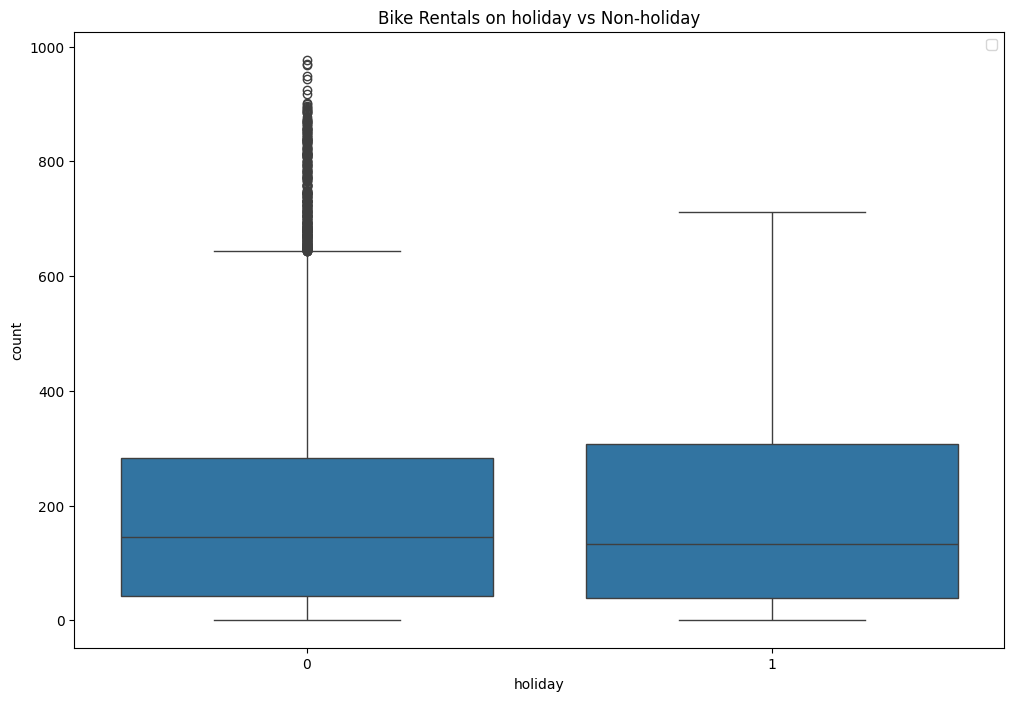

In [ ]:
#outlier checks: Bivariate Analysis

plt.figure(figsize=(12,8))
plt.title("Bike Rentals on holiday vs Non-holiday")
sns.boxplot(df_bike_sharing,x='holiday',y='count')
plt.legend(loc='best')

<ipython-input-184-182af4a7bdec>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


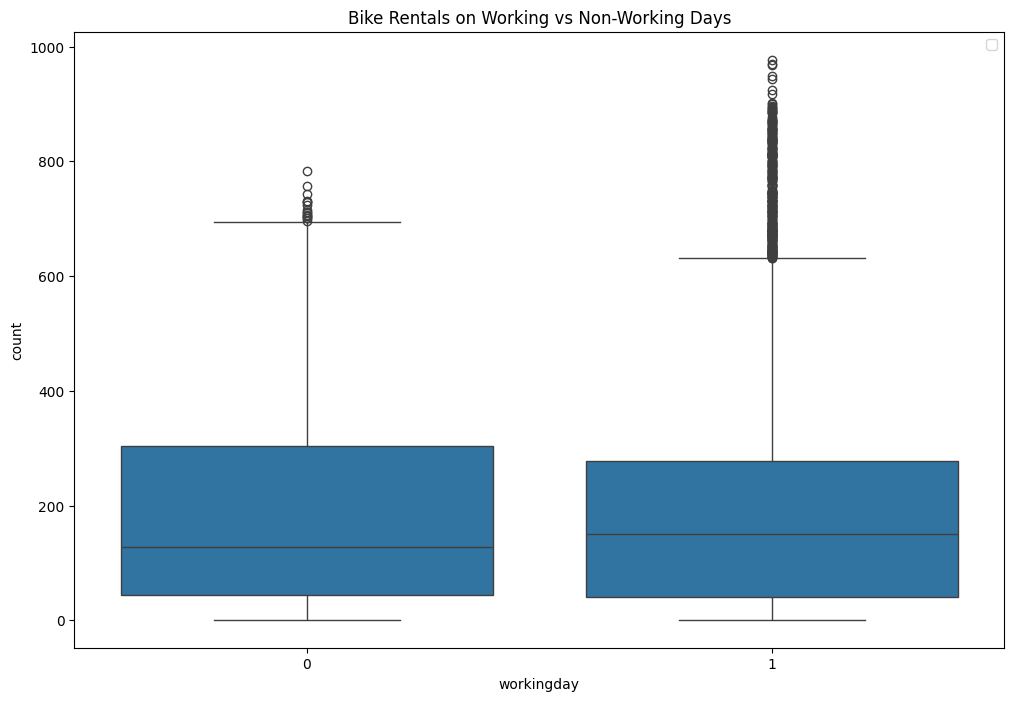

In [ ]:
#outlier checks: Bivariate Analysis

plt.figure(figsize=(12,8))
plt.title("Bike Rentals on Working vs Non-Working Days")
sns.boxplot(df_bike_sharing,x='workingday',y='count')
plt.legend(loc='best')

<ipython-input-185-b3090a5af4d7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bike_sharing, x='season', y='registered', palette='Blues')
<ipython-input-185-b3090a5af4d7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bike_sharing, x='season', y='casual', palette='Greens')
<ipython-input-185-b3090a5af4d7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bike_sharing, x='weather', y='registered', palette='Blues')
<ipython-input-185-b3090a5af4d7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is d

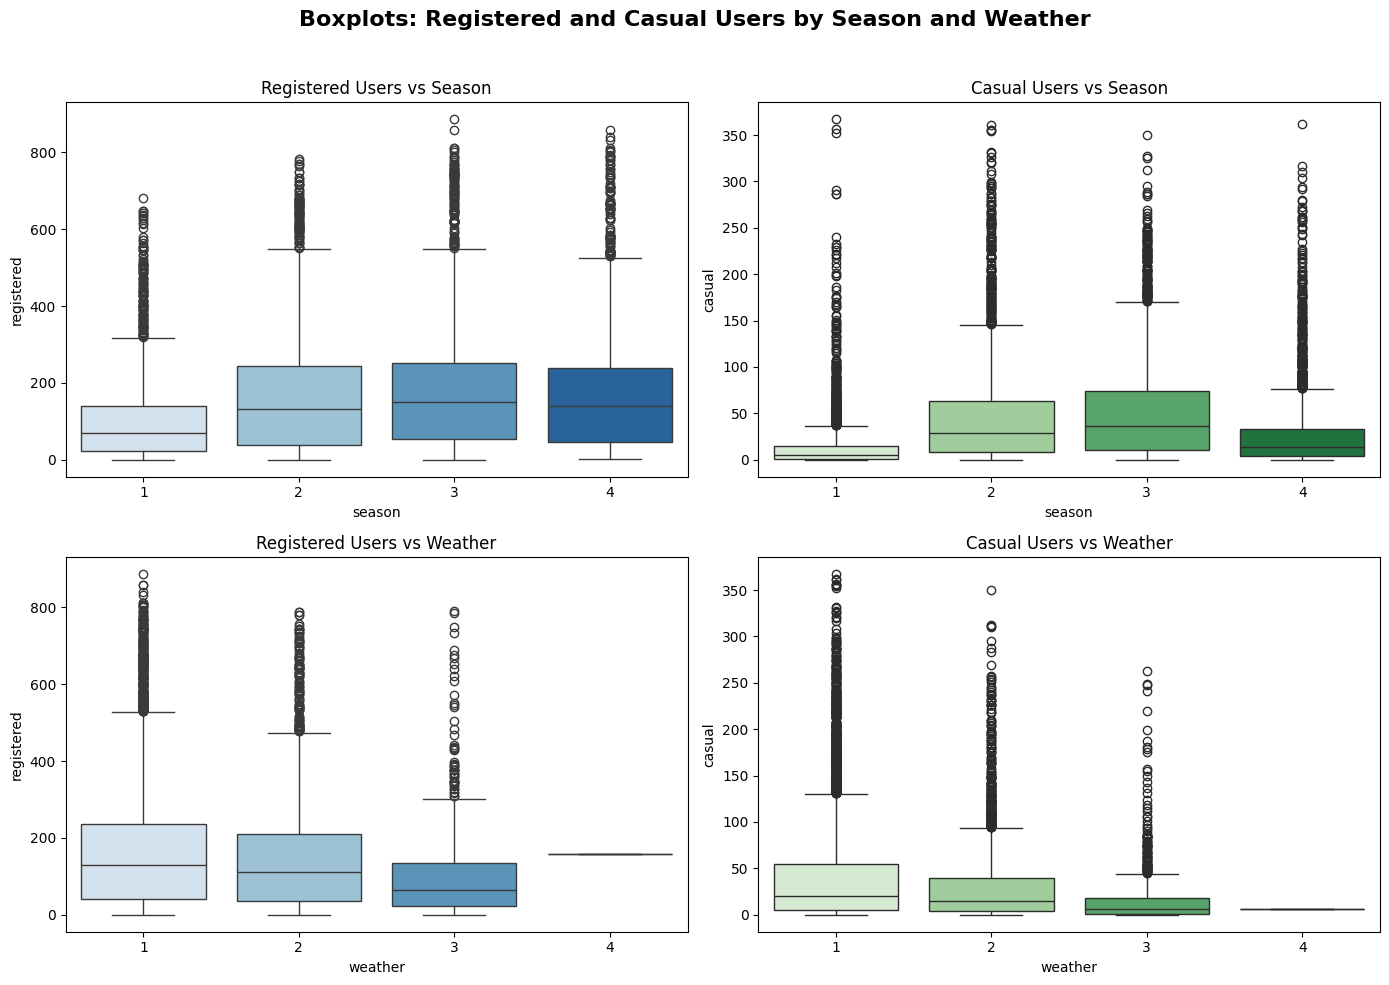

In [ ]:
#outlier checks: Bivariate Analysis

plt.figure(figsize=(14, 10))

# 1. Registered vs Season
plt.subplot(2, 2, 1)
sns.boxplot(data=df_bike_sharing, x='season', y='registered', palette='Blues')
plt.title('Registered Users vs Season')

# 2. Casual vs Season
plt.subplot(2, 2, 2)
sns.boxplot(data=df_bike_sharing, x='season', y='casual', palette='Greens')
plt.title('Casual Users vs Season')

# 3. Registered vs Weather
plt.subplot(2, 2, 3)
sns.boxplot(data=df_bike_sharing, x='weather', y='registered', palette='Blues')
plt.title('Registered Users vs Weather')

# 4. Casual vs Weather
plt.subplot(2, 2, 4)
sns.boxplot(data=df_bike_sharing, x='weather', y='casual', palette='Greens')
plt.title('Casual Users vs Weather')

plt.suptitle('Boxplots: Registered and Casual Users by Season and Weather', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-186-7b6a6940859c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bike_sharing, x='workingday', y='registered', palette='Blues')
<ipython-input-186-7b6a6940859c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bike_sharing, x='workingday', y='casual', palette='Greens')
<ipython-input-186-7b6a6940859c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bike_sharing, x='holiday', y='registered', palette='Blues')
<ipython-input-186-7b6a6940859c>:22: FutureWarning: 

Passing `palette` without assigning `h

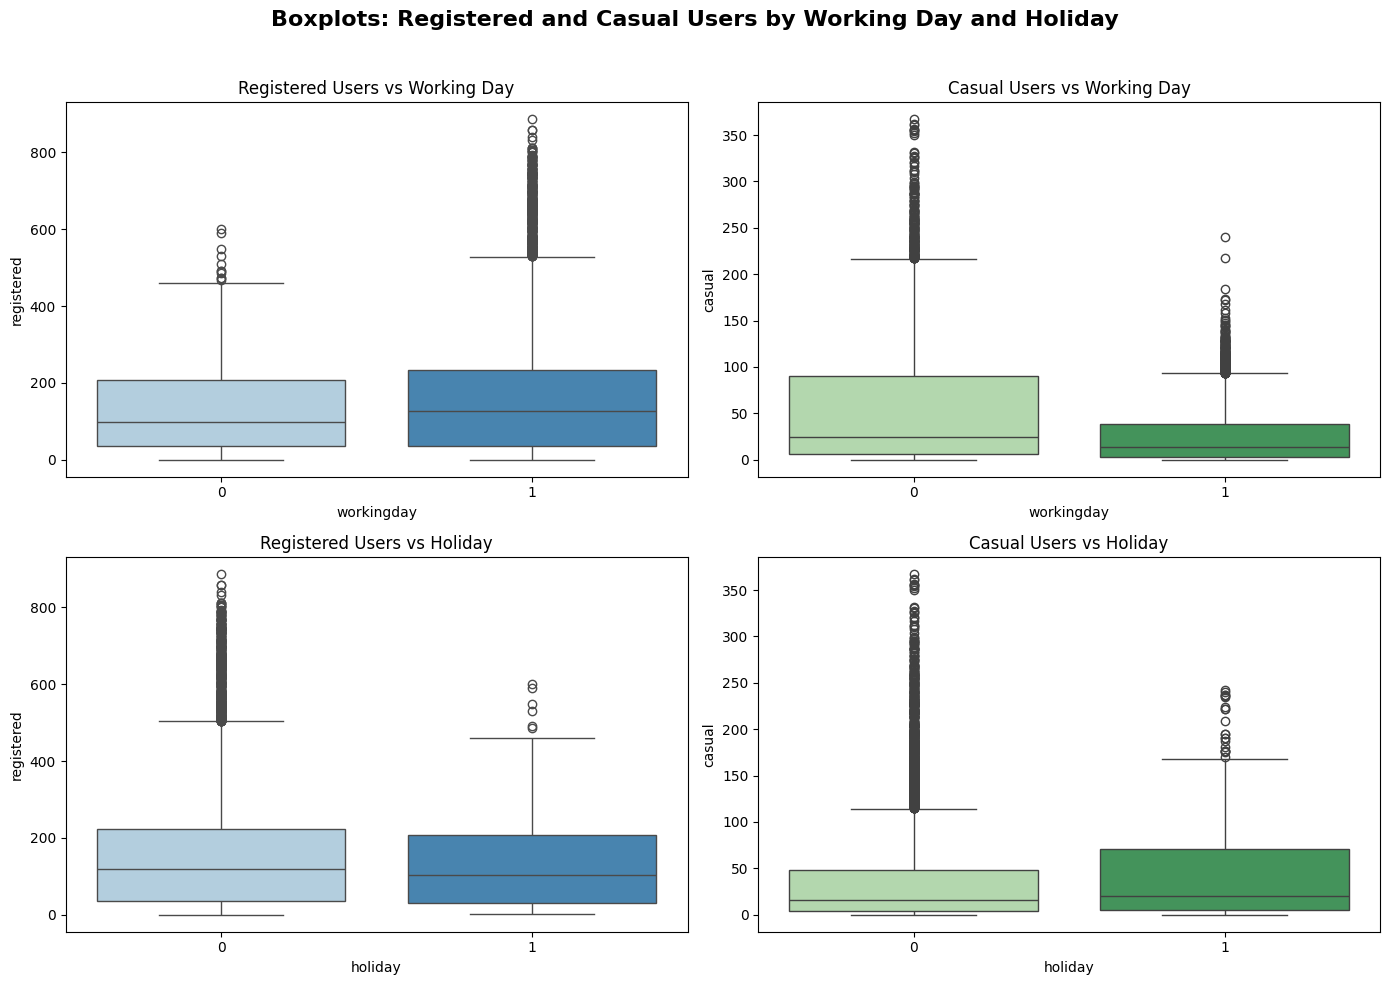

In [ ]:
#outlier checks: Bivariate Analysis

plt.figure(figsize=(14, 10))

# 1. Registered vs Workingday
plt.subplot(2, 2, 1)
sns.boxplot(data=df_bike_sharing, x='workingday', y='registered', palette='Blues')
plt.title('Registered Users vs Working Day')

# 2. Casual vs Workingday
plt.subplot(2, 2, 2)
sns.boxplot(data=df_bike_sharing, x='workingday', y='casual', palette='Greens')
plt.title('Casual Users vs Working Day')

# 3. Registered vs Holiday
plt.subplot(2, 2, 3)
sns.boxplot(data=df_bike_sharing, x='holiday', y='registered', palette='Blues')
plt.title('Registered Users vs Holiday')

# 4. Casual vs Holiday
plt.subplot(2, 2, 4)
sns.boxplot(data=df_bike_sharing, x='holiday', y='casual', palette='Greens')
plt.title('Casual Users vs Holiday')

plt.suptitle('Boxplots: Registered and Casual Users by Working Day and Holiday', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Axes: title={'center': 'Scatter Plot: ATemperature vs Rental Count'}, xlabel='atemp', ylabel='count'>

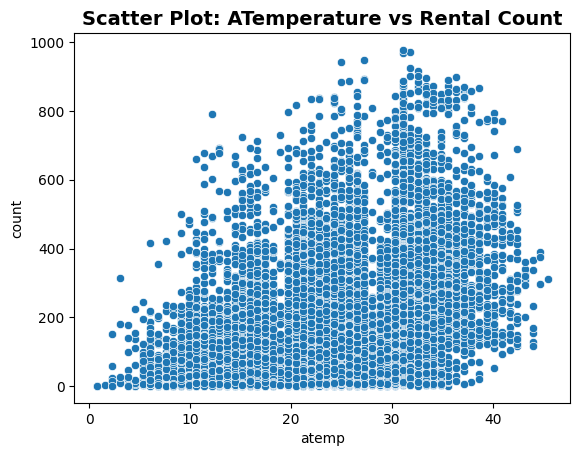

In [ ]:
plt.title('Scatter Plot: ATemperature vs Rental Count', fontsize=14, fontweight='bold')
sns.scatterplot(x='atemp', y='count', data=df_bike_sharing)

<Axes: title={'center': 'Scatter Plot: Humidity vs Rental Count'}, xlabel='humidity', ylabel='count'>

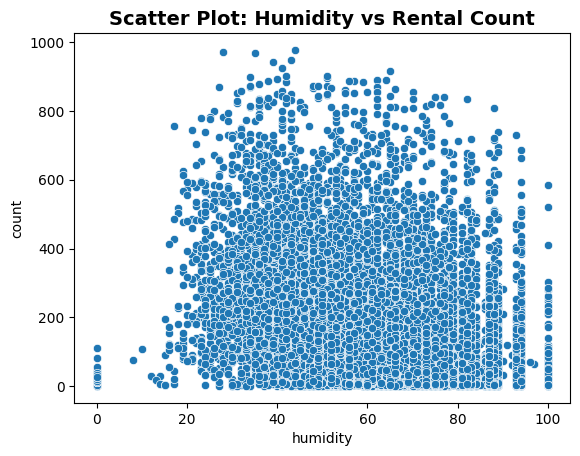

In [ ]:
plt.title('Scatter Plot: Humidity vs Rental Count', fontsize=14, fontweight='bold')
sns.scatterplot(x='humidity', y='count', data=df_bike_sharing)

<Axes: title={'center': 'Scatter Plot: Temperature vs Rental Count'}, xlabel='temp', ylabel='count'>

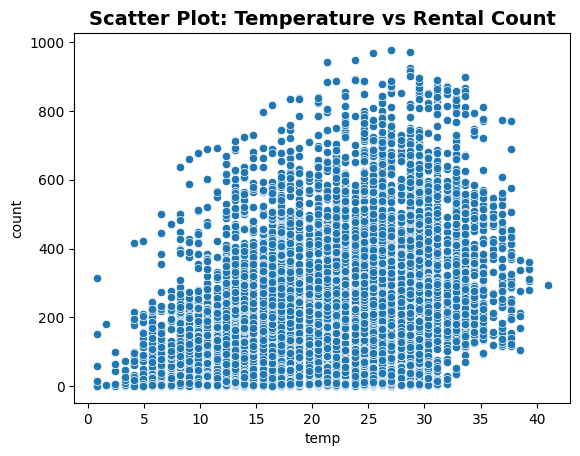

In [ ]:
plt.title('Scatter Plot: Temperature vs Rental Count', fontsize=14, fontweight='bold')
sns.scatterplot(x='temp', y='count', data=df_bike_sharing)

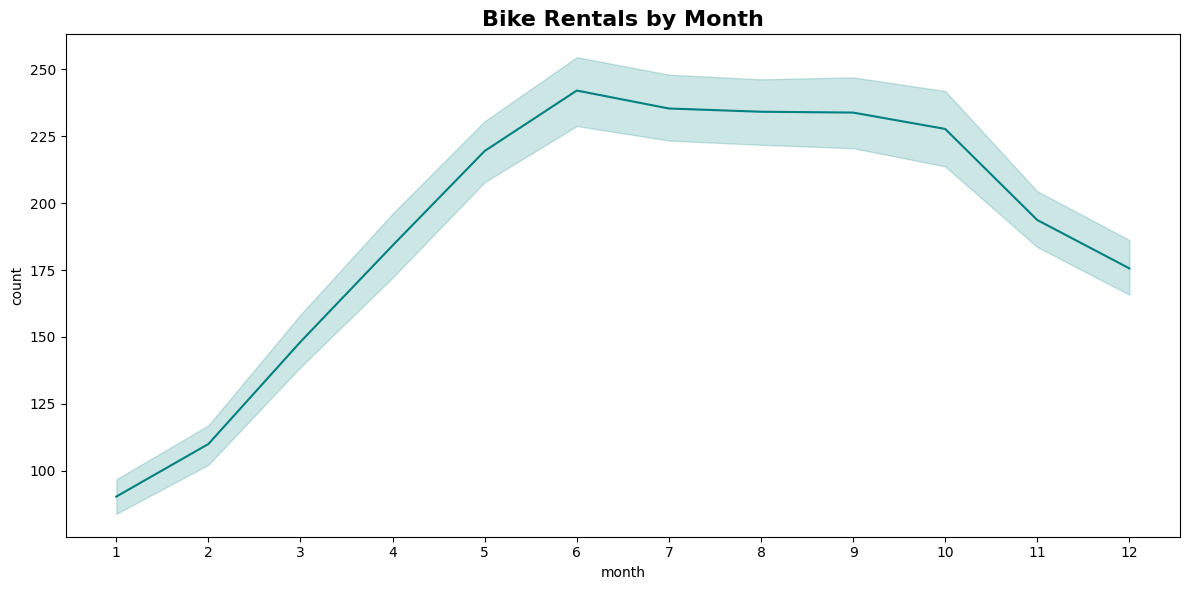

In [ ]:
#Line plot to understand Trend:

df_bike_sharing['datetime']= pd.to_datetime(df_bike_sharing['datetime'])
df_bike_sharing['month'] = df_bike_sharing['datetime'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='count', data=df_bike_sharing, color='teal')
plt.title('Bike Rentals by Month', fontsize=16, fontweight='bold')
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.tight_layout()
plt.show()

In [ ]:
#Shows the months where count is high. Months 6-9 are crucial. Shows that demand can increase with rise in temperatures indirectly through the months data (summer).

#Hypothesis Testing:

## 2- Sample T-Test:


In [ ]:
data_working=df_bike_sharing.loc[df_bike_sharing['workingday'] == 1]['count']
data_notworking=df_bike_sharing.loc[df_bike_sharing['workingday'] == 0]['count']

In [ ]:
#Visual tool:
from statsmodels.graphics.gofplots import qqplot

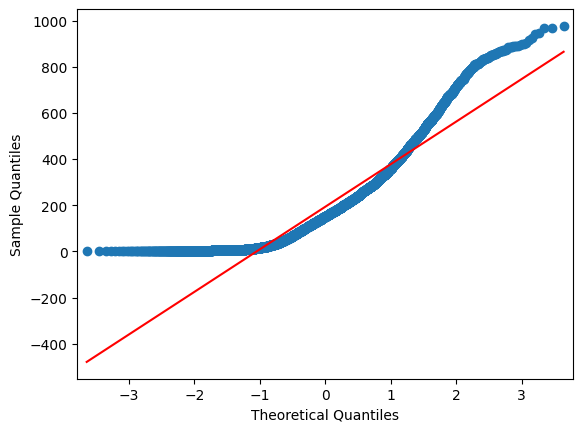

In [ ]:
#Q-Q plot
qqplot(data_working, line="s")
plt.show()

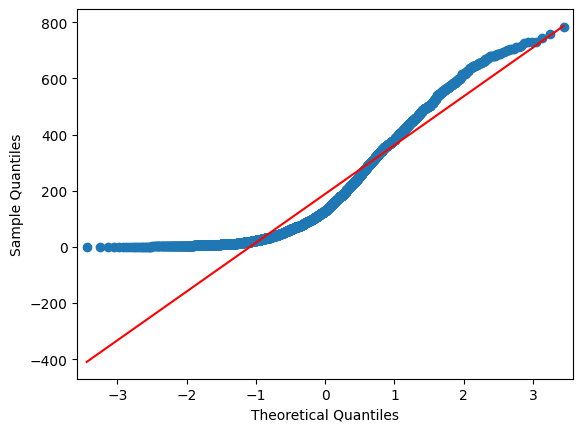

In [ ]:
#Q-Q plot
qqplot(data_notworking, line="s")
plt.show()

<Axes: xlabel='count', ylabel='Count'>

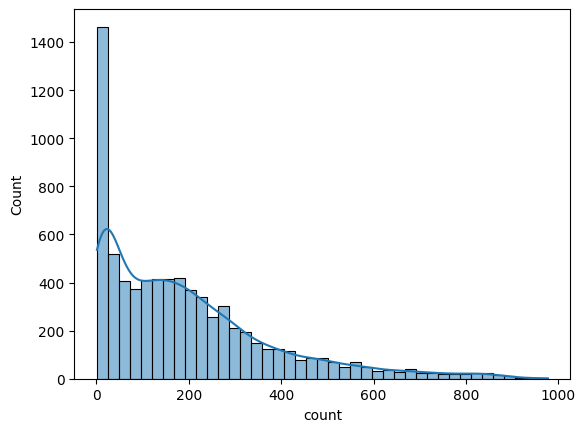

In [ ]:
#understanding underlying data distribution.
sns.histplot(data_working,kde=True)

<Axes: xlabel='count', ylabel='Count'>

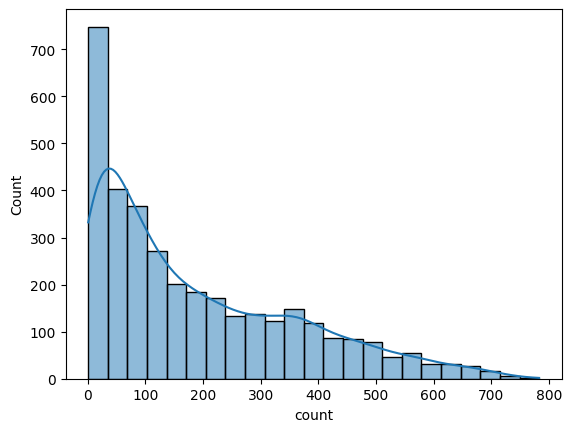

In [ ]:
#understanding underlying data distribution.
sns.histplot(data_notworking,kde=True)

In [ ]:
data_notworking.mean()

np.float64(188.50662061024755)

In [ ]:
data_working.mean()

np.float64(193.01187263896384)

In [ ]:
#Normality test:
from scipy.stats import shapiro
# H0: Data is Gaussian
# Ha: Data is not Gaussian
test_stat, p_value = shapiro(data_working)
print(p_value)
#Shapiro works with lesser sample size. With this many samples the result maybe inaccurate.

2.2521124830019574e-61


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7412.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset_w = data_working.sample(1000)
test_stat, p_value = shapiro(subset_w)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

2.5741875567664233e-28
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset_nw = data_notworking.sample(1000)
test_stat, p_value = shapiro(subset_nw)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

6.696129528505756e-27
Reject H0
Data is not Gaussian


In [ ]:
#But since this data might a sample of a larger populoation (in real terms). i would apply t-test this. (Due to CLT):

In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(data_working, data_notworking)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are equal.

0.9437823280916695
Variances are  equal


In [ ]:
#T-test: Working vs Non-working wrt count.

#H0: The mean for working day rentals equals the mean for non-working day rentals.
#H1: The mean for working day rentals is not equal to the mean for non-working day rentals.

from scipy.stats import ttest_ind
stat, p = ttest_ind(data_working, data_notworking)
print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis:The mean for working day rentals is significantly different from the non-working day rentals ")
else:
  print("Fail to reject the null hypothesis:The mean for working day rentals is not significantly different from non-working day rentals.")

#Conclusion: The test concludes that the mean for working day rentals is not significantly different from the mean for non-working day rentals at the 0.05 significance level.

0.9437823280916695
Fail to reject the null hypothesis:The mean for working day rentals is not significantly different from non-working day rentals.


In [ ]:
#T-test: Holiday vs Non-Holiday wrt count.

#H0: The mean for Holiday rentals equals the mean for non-Holiday rentals.
#H1: The mean for Holiday rentals is not equal to the mean for non-Holiday rentals.

holiday_data = df_bike_sharing[df_bike_sharing['holiday'] == 1]['count']
non_holiday_data = df_bike_sharing[df_bike_sharing['holiday'] == 0]['count']
stat, p_value = ttest_ind(holiday_data, non_holiday_data)
print(f'p-value: {p_value}')
if p_value < 0.05:
    print("Reject the null hypothesis: The mean count on holidays is significantly different from non-holidays.")
else:
    print("Fail to reject the null hypothesis: The mean count on holidays is not significantly different from non-holidays.")

#Conclusion: The test concludes that the mean for holiday rentals is not significantly different from the mean for non-holiday rentals at the 0.05 significance level.

p-value: 0.5736923883271103
Fail to reject the null hypothesis: The mean count on holidays is not significantly different from non-holidays.


In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(holiday_data, non_holiday_data)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are equal.

0.9991178954732041
Variances are  equal


In [ ]:
#T-test: Holiday vs Non-Holiday wrt registered.

#H0: The mean for Holiday rentals equals the mean for non-Holiday rentals(registered).
#H1: The mean for Holiday rentals is not equal to the mean for non-Holiday rentals(registered).

registered_holiday = df_bike_sharing[df_bike_sharing['holiday'] == 1]['registered']
registered_non_holiday = df_bike_sharing[df_bike_sharing['holiday'] == 0]['registered']
stat, p_value_registered = ttest_ind(registered_holiday, registered_non_holiday)
print(f'p-value (Registered): {p_value_registered}')
if p_value_registered < 0.05:
    print("Reject the null hypothesis: The mean count for registered users on holidays is significantly different from non-holidays.")
else:
    print("Fail to reject the null hypothesis: The mean count for registered users on holidays is not significantly different from non-holidays.")

p-value (Registered): 0.028784891923603277
Reject the null hypothesis: The mean count for registered users on holidays is significantly different from non-holidays.


In [ ]:
registered_holiday.mean()

np.float64(137.09646302250803)

In [ ]:
registered_non_holiday.mean()

np.float64(156.09494089834516)

In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(registered_holiday, registered_non_holiday)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are equal.

0.04572711847188819
Variances are not equal


In [ ]:
#T-test: Holiday vs Non-Holiday wrt casual.

#H0: The mean for Holiday rentals equals the mean for non-Holiday rentals(casual).
#H1: The mean for Holiday rentals is not equal to the mean for non-Holiday rentals(casual).

casual_holiday = df_bike_sharing[df_bike_sharing['holiday'] == 1]['casual']
casual_non_holiday = df_bike_sharing[df_bike_sharing['holiday'] == 0]['casual']
stat, p_value_casual = ttest_ind(casual_holiday, casual_non_holiday)
print(f'p-value (Casual): {p_value_casual}')
if p_value_casual < 0.05:
    print("Reject the null hypothesis: The mean count for casual users on holidays is significantly different from non-holidays.")
else:
    print("Fail to reject the null hypothesis: The mean count for casual users on holidays is not significantly different from non-holidays.")

p-value (Casual): 4.843060024095186e-06
Reject the null hypothesis: The mean count for casual users on holidays is significantly different from non-holidays.


In [ ]:
casual_holiday.mean()

np.float64(48.78135048231511)

In [ ]:
casual_non_holiday.mean()

np.float64(35.64671394799054)

In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(casual_holiday, casual_non_holiday)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are equal.

2.556136321605301e-06
Variances are not equal


In [ ]:
#T-test: workingday vs Non-workingday wrt registered.

#H0: The mean for working day rentals equals the mean for non-working day rentals(registered).
#H1: The mean for working day rentals is not equal to the mean for non-working day rentals(registered).

registered_working = df_bike_sharing[df_bike_sharing['workingday'] == 1]['registered']
registered_non_working = df_bike_sharing[df_bike_sharing['workingday'] == 0]['registered']
stat, p_value_registered = ttest_ind(registered_working, registered_non_working)
print(f'p-value (Registered - Working vs Non-working): {p_value_registered}')
if p_value_registered < 0.05:
    print("Reject the null hypothesis: The mean count for registered users on working days is significantly different from non-working days.")
else:
    print("Fail to reject the null hypothesis: The mean count for registered users on working days is not significantly different from non-working days.")

p-value (Registered - Working vs Non-working): 6.806493719916074e-36
Reject the null hypothesis: The mean count for registered users on working days is significantly different from non-working days.


In [ ]:
registered_working.mean()

np.float64(167.9042093901781)

In [ ]:
registered_non_working.mean()

np.float64(129.19833045480715)

In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(registered_working, registered_non_working)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are equal.

4.566194753672492e-46
Variances are not equal


In [ ]:
#T-test: workingday vs Non-workingday wrt registered.

#H0: The mean for working day rentals equals the mean for non-working day rentals(casual).
#H1: The mean for working day rentals is not equal to the mean for non-working day rentals(casual).

casual_working = df_bike_sharing[df_bike_sharing['workingday'] == 1]['casual']
casual_non_working = df_bike_sharing[df_bike_sharing['workingday'] == 0]['casual']
stat, p_value_casual = ttest_ind(casual_working, casual_non_working)
print(f'p-value (Casual - Working vs Non-working): {p_value_casual}')
if p_value_casual < 0.05:
    print("Reject the null hypothesis: The mean count for casual users on working days is significantly different from non-working days.")
else:
    print("Fail to reject the null hypothesis: The mean count for casual users on working days is not significantly different from non-working days.")

p-value (Casual - Working vs Non-working): 3.56196742360544e-256
Reject the null hypothesis: The mean count for casual users on working days is significantly different from non-working days.


In [ ]:
casual_working.mean()

np.float64(25.10766324878575)

In [ ]:
casual_non_working.mean()

np.float64(59.30829015544042)

In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(casual_working, casual_non_working)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are equal.

5.1587614828404776e-284
Variances are not equal


Since count is just the sum of registered and casual users, it might mask any subtle differences in the behavior of these two groups.

The total count might not show significance because the two types of users (registered and casual) could behave differently on working vs non-working days or holidays vs non-holidays, and the sum could balance out these differences.

 Behavior of casual and registered users are distinct, and separating them allows us to uncover hidden trends that the total count wouldn’t reveal.



 Casual users increase on holidays and non-working days, while registered users increase on working days and non-holiday.


##ANNOVA/Kruskal Wallis to check if No. of cycles rented is similar or different in different :


In [ ]:
df_1=df_bike_sharing.loc[df_bike_sharing['weather']==1]['count']
df_2=df_bike_sharing.loc[df_bike_sharing['weather']==2]['count']
df_3=df_bike_sharing.loc[df_bike_sharing['weather']==3]['count']
df_4=df_bike_sharing.loc[df_bike_sharing['weather']==4]['count']

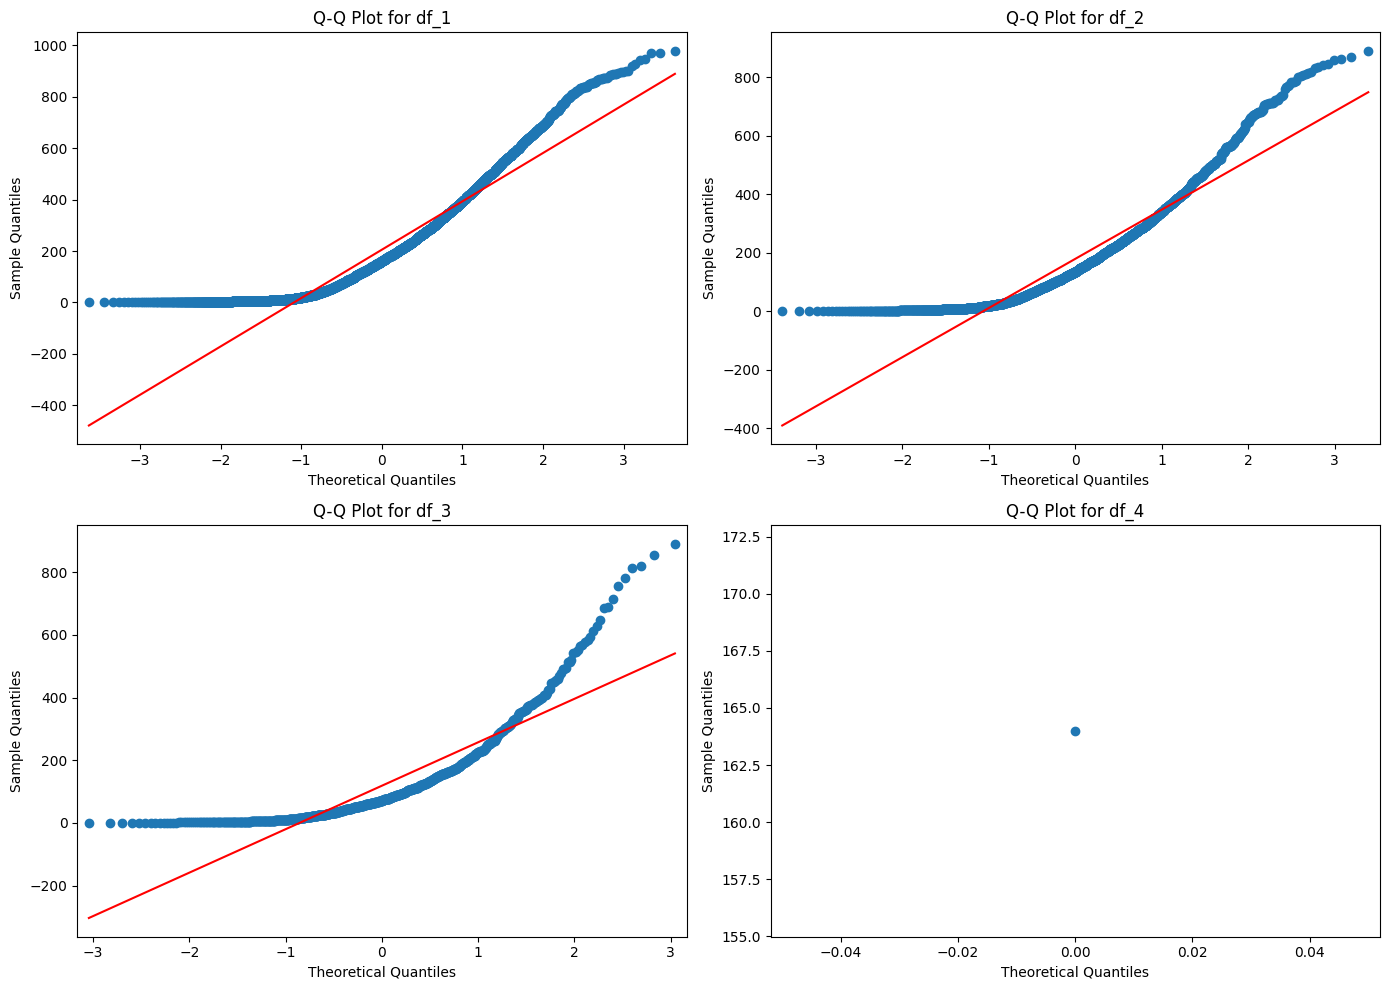

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

qqplot(df_1, line="s", ax=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot for df_1")

qqplot(df_2, line="s", ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot for df_2")

qqplot(df_3, line="s", ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot for df_3")

qqplot(df_4, line="s", ax=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot for df_4")

plt.tight_layout()
plt.show()

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset = df_1.sample(1000)
test_stat, p_value = shapiro(subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

1.5413988815163303e-27
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset = df_2.sample(1000)
test_stat, p_value = shapiro(subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

1.0302669315985217e-28
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset = df_3.sample(100)
test_stat, p_value = shapiro(subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

4.908088390288767e-07
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
#subset = df_4.sample(1000)
test_stat, p_value = shapiro(df_4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

nan
Fail to reject H0
Data is Gaussian


<ipython-input-228-9f7f601fbc37>:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  test_stat, p_value = shapiro(df_4)


In [ ]:
#only one data for weather 4 Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
df_4

,count
5631,164


In [ ]:
#only one value in with weather 4.

In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(df_1, df_2,df_3,df_4)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are not equal.

3.504937946833238e-35
Variances are not equal


In [ ]:
#CLT needs large enough samples per group, not just overall. And for ANOVA, it's per group that matters

In [ ]:
#Kruskal-Wallis
#H0 : All groups have same median
#H1 : Atleast one group have different median
#exclusion of df_4
from scipy.stats import kruskal
stat, p_value = kruskal(df_1, df_2, df_3)
print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")
#Conclusion: The test concludes that the at least one group (Weather) has significanlty different median.


3.122066178659941e-45
Reject the null hypothesis: At least one group is significantly different.


In [ ]:
#inclsuion of df_4
from scipy.stats import kruskal
stat, p_value = kruskal(df_1, df_2, df_3,df_4)
print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")
#inclusion of the group with one data point does not change the p-value, it suggests that the other groups are dominant in terms of variability.

3.501611300708679e-44
Reject the null hypothesis: At least one group is significantly different.


In [ ]:
#Seasons:

In [ ]:
df_1=df_bike_sharing.loc[df_bike_sharing['season']==1]['count']
df_2=df_bike_sharing.loc[df_bike_sharing['season']==2]['count']
df_3=df_bike_sharing.loc[df_bike_sharing['season']==3]['count']
df_4=df_bike_sharing.loc[df_bike_sharing['season']==4]['count']

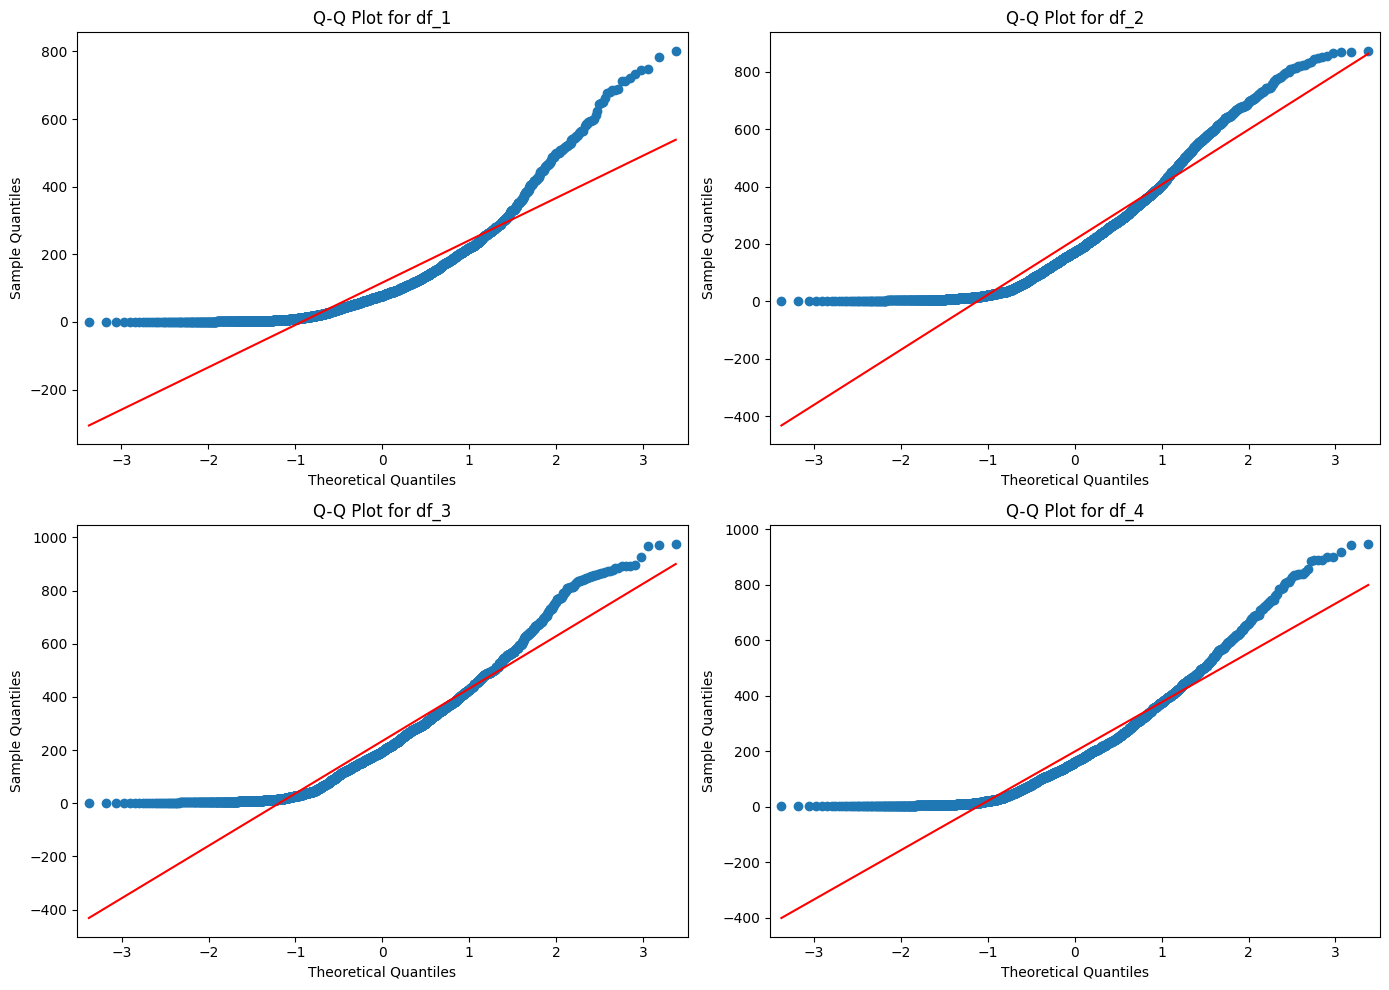

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

qqplot(df_1, line="s", ax=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot for df_1")

qqplot(df_2, line="s", ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot for df_2")

qqplot(df_3, line="s", ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot for df_3")

qqplot(df_4, line="s", ax=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot for df_4")

plt.tight_layout()
plt.show()

In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset = df_1.sample(1000)
test_stat, p_value = shapiro(subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

1.2721311316722513e-33
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset = df_2.sample(1000)
test_stat, p_value = shapiro(subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

2.1827636576097378e-23
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset = df_3.sample(1000)
test_stat, p_value = shapiro(subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

8.032524879090231e-23
Reject H0
Data is not Gaussian


In [ ]:
# H0: Data is Gaussian
# Ha: Data is not Gaussian
np.random.sample(42)
subset = df_4.sample(1000)
test_stat, p_value = shapiro(subset)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("Data is not Gaussian")
else:
    print("Fail to reject H0")
    print("Data is Gaussian")
#Not normal

4.1190012452923567e-26
Reject H0
Data is not Gaussian


In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(df_1, df_2,df_3,df_4)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are not equal.

1.0147116860043298e-118
Variances are not equal


In [ ]:
#Kruskal-Wallis

#H0 : All groups have same median
#H1 : Atleast one group have different median
#exclusion of df_4
from scipy.stats import kruskal
stat, p_value = kruskal(df_1, df_2, df_3)
print(p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")
#Conclusion: The test concludes that the at least one group (Season) has significanlty different median.

5.552206425259624e-146
Reject the null hypothesis: At least one group is significantly different.


In [ ]:
#Kruskal-Wallis: registered vs weather

#H0 : All groups have same median
#H1 : Atleast one group have different median

df_1=df_bike_sharing.loc[df_bike_sharing['weather']==1]['registered']
df_2=df_bike_sharing.loc[df_bike_sharing['weather']==2]['registered']
df_3=df_bike_sharing.loc[df_bike_sharing['weather']==3]['registered']
df_4=df_bike_sharing.loc[df_bike_sharing['weather']==4]['registered']
stat, p_value = kruskal(df_1, df_2, df_3,df_4)
print("Weather vs Registered - p-value:", p_value)
if p_value < 0.05:
    print("Reject H0: At least one weather group differs in registered counts.")
else:
    print("Fail to reject H0: No significant difference in registered counts among weather groups.")

Weather vs Registered - p-value: 1.8239836388365876e-37
Reject H0: At least one weather group differs in registered counts.


In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(df_1, df_2,df_3,df_4)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are not equal.

3.85963806570744e-22
Variances are not equal


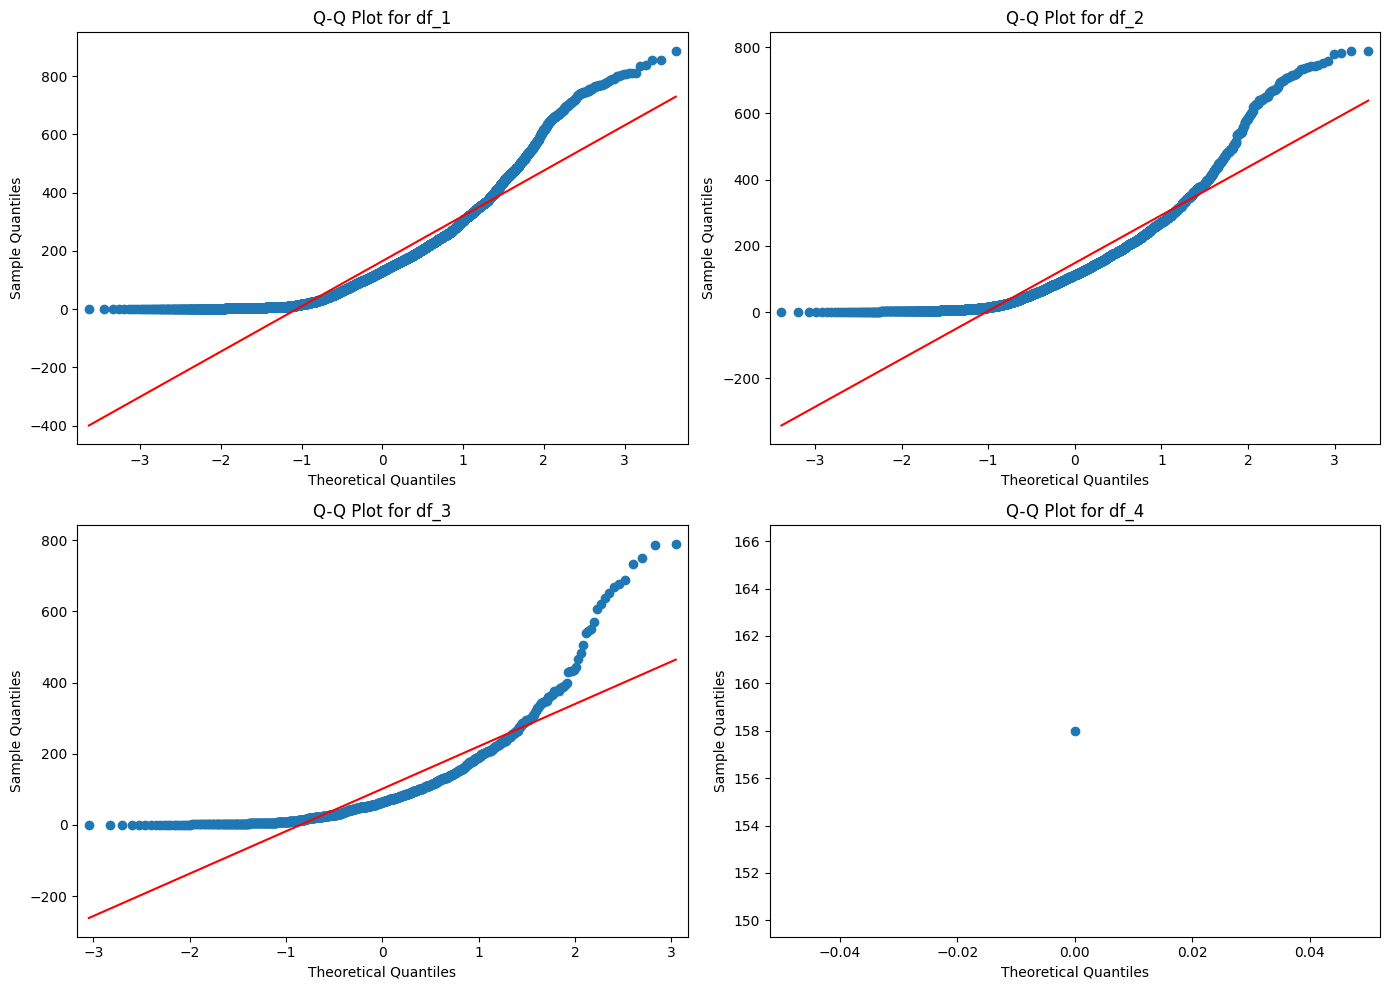

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

qqplot(df_1, line="s", ax=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot for df_1")

qqplot(df_2, line="s", ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot for df_2")

qqplot(df_3, line="s", ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot for df_3")

qqplot(df_4, line="s", ax=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot for df_4")

plt.tight_layout()
plt.show()

In [ ]:
#Kruskal-Wallis: registered vs season

#H0 : All groups have same median
#H1 : Atleast one group have different median

df_1=df_bike_sharing.loc[df_bike_sharing['season']==1]['registered']
df_2=df_bike_sharing.loc[df_bike_sharing['season']==2]['registered']
df_3=df_bike_sharing.loc[df_bike_sharing['season']==3]['registered']
df_4=df_bike_sharing.loc[df_bike_sharing['season']==4]['registered']
stat, p_value = kruskal(df_1, df_2, df_3,df_4)
print("season vs Registered - p-value:", p_value)
if p_value < 0.05:
    print("Reject H0: At least one season group differs in registered counts.")
else:
    print("Fail to reject H0: No significant difference in registered counts among season groups.")

season vs Registered - p-value: 2.3698212326776174e-117
Reject H0: At least one season group differs in registered counts.


In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(df_1, df_2,df_3,df_4)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are not equal.

3.696231945833219e-74
Variances are not equal


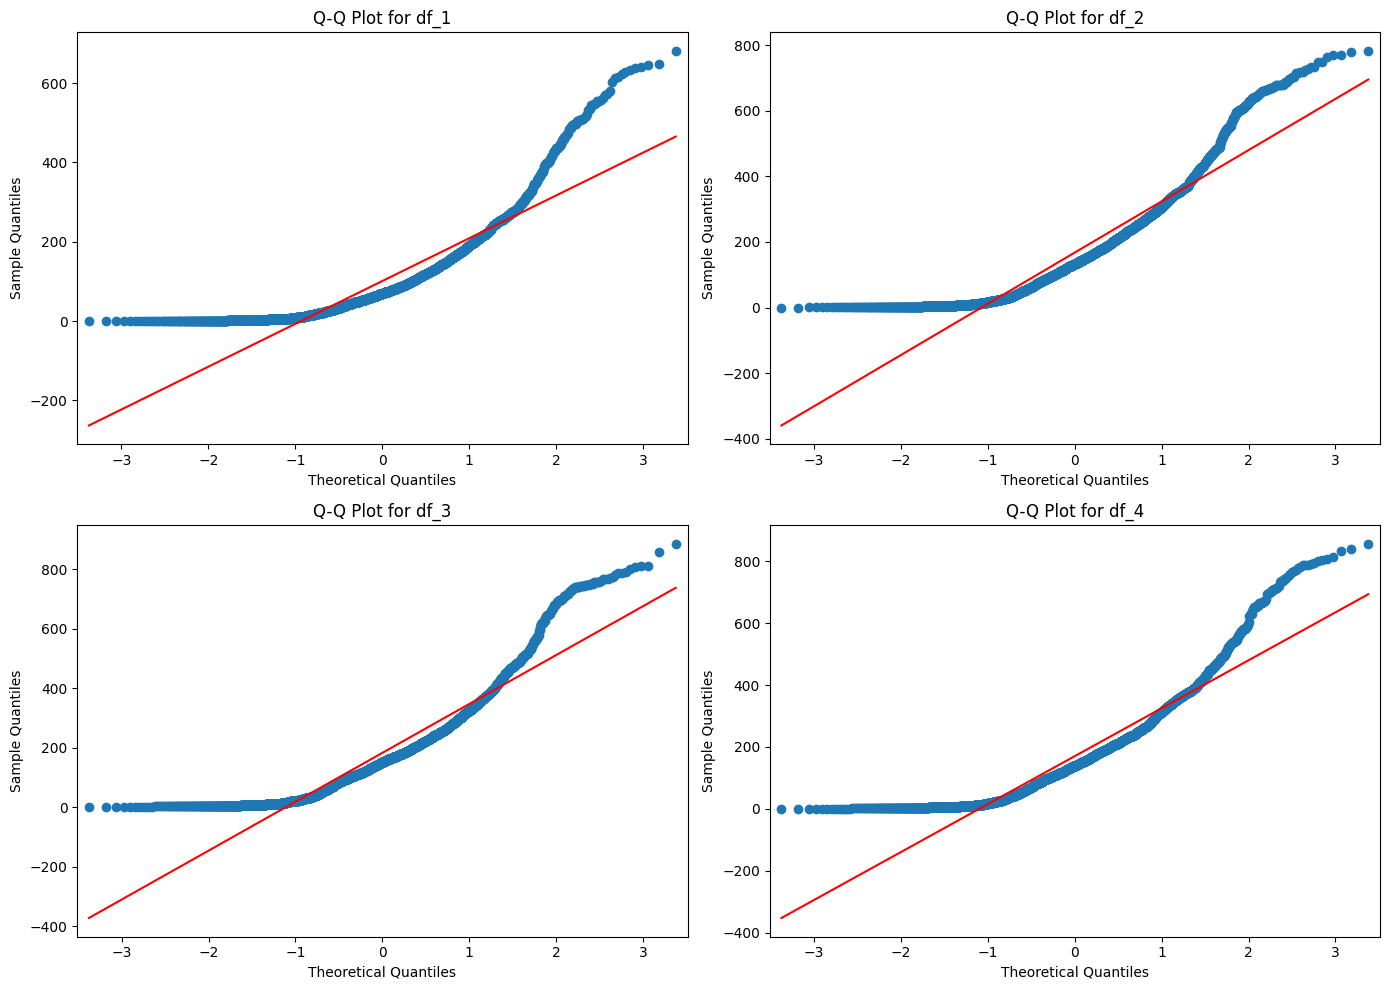

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

qqplot(df_1, line="s", ax=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot for df_1")

qqplot(df_2, line="s", ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot for df_2")

qqplot(df_3, line="s", ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot for df_3")

qqplot(df_4, line="s", ax=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot for df_4")

plt.tight_layout()
plt.show()

In [ ]:
#Kruskal-Wallis: weather vs casual

#H0 : All groups have same median
#H1 : Atleast one group have different median

df_1=df_bike_sharing.loc[df_bike_sharing['weather']==1]['casual']
df_2=df_bike_sharing.loc[df_bike_sharing['weather']==2]['casual']
df_3=df_bike_sharing.loc[df_bike_sharing['weather']==3]['casual']
df_4=df_bike_sharing.loc[df_bike_sharing['weather']==4]['casual']
stat, p_value = kruskal(df_1, df_2, df_3,df_4)
print("Weather vs casual - p-value:", p_value)
if p_value < 0.05:
    print("Reject H0: At least one weather group differs in casual counts.")
else:
    print("Fail to reject H0: No significant difference in casual counts among weather groups.")

Weather vs casual - p-value: 1.6853366233576997e-61
Reject H0: At least one weather group differs in casual counts.


In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(df_1, df_2,df_3,df_4)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are not equal.

6.8852993703088826e-40
Variances are not equal


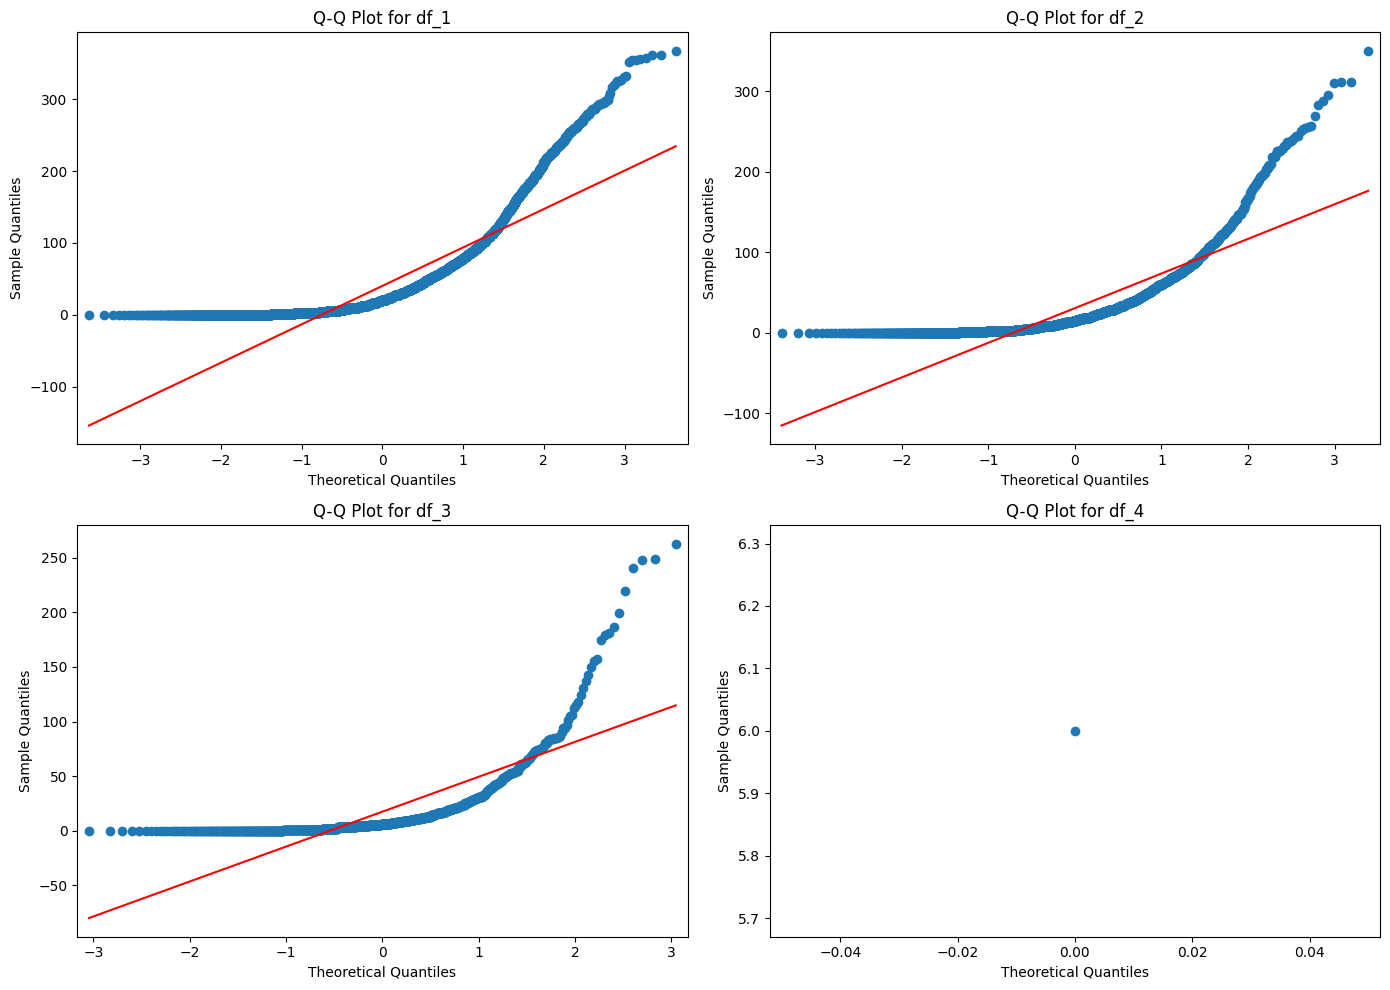

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

qqplot(df_1, line="s", ax=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot for df_1")

qqplot(df_2, line="s", ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot for df_2")

qqplot(df_3, line="s", ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot for df_3")

qqplot(df_4, line="s", ax=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot for df_4")

plt.tight_layout()
plt.show()

In [ ]:
#Kruskal-Wallis: season vs casual

#H0 : All groups have same median
#H1 : Atleast one group have different median

df_1=df_bike_sharing.loc[df_bike_sharing['season']==1]['casual']
df_2=df_bike_sharing.loc[df_bike_sharing['season']==2]['casual']
df_3=df_bike_sharing.loc[df_bike_sharing['season']==3]['casual']
df_4=df_bike_sharing.loc[df_bike_sharing['season']==4]['casual']
stat, p_value = kruskal(df_1, df_2, df_3,df_4)
print("season vs casual - p-value:", p_value)
if p_value < 0.05:
    print("Reject H0: At least one season group differs in casual counts.")
else:
    print("Fail to reject H0: No significant difference in casual counts among season groups.")

season vs casual - p-value: 0.0
Reject H0: At least one season group differs in casual counts.


In [ ]:
#levene test for equal variance.
# H0: Variances are equal
# Ha: Variances are not equal
from scipy.stats import levene
stat, p_value = levene(df_1, df_2,df_3,df_4)
print(p_value)
if p_value < 0.05:
    print("Variances are not equal")
else:
  print("Variances are  equal")

#Variance are not equal.

4.687503378254754e-155
Variances are not equal


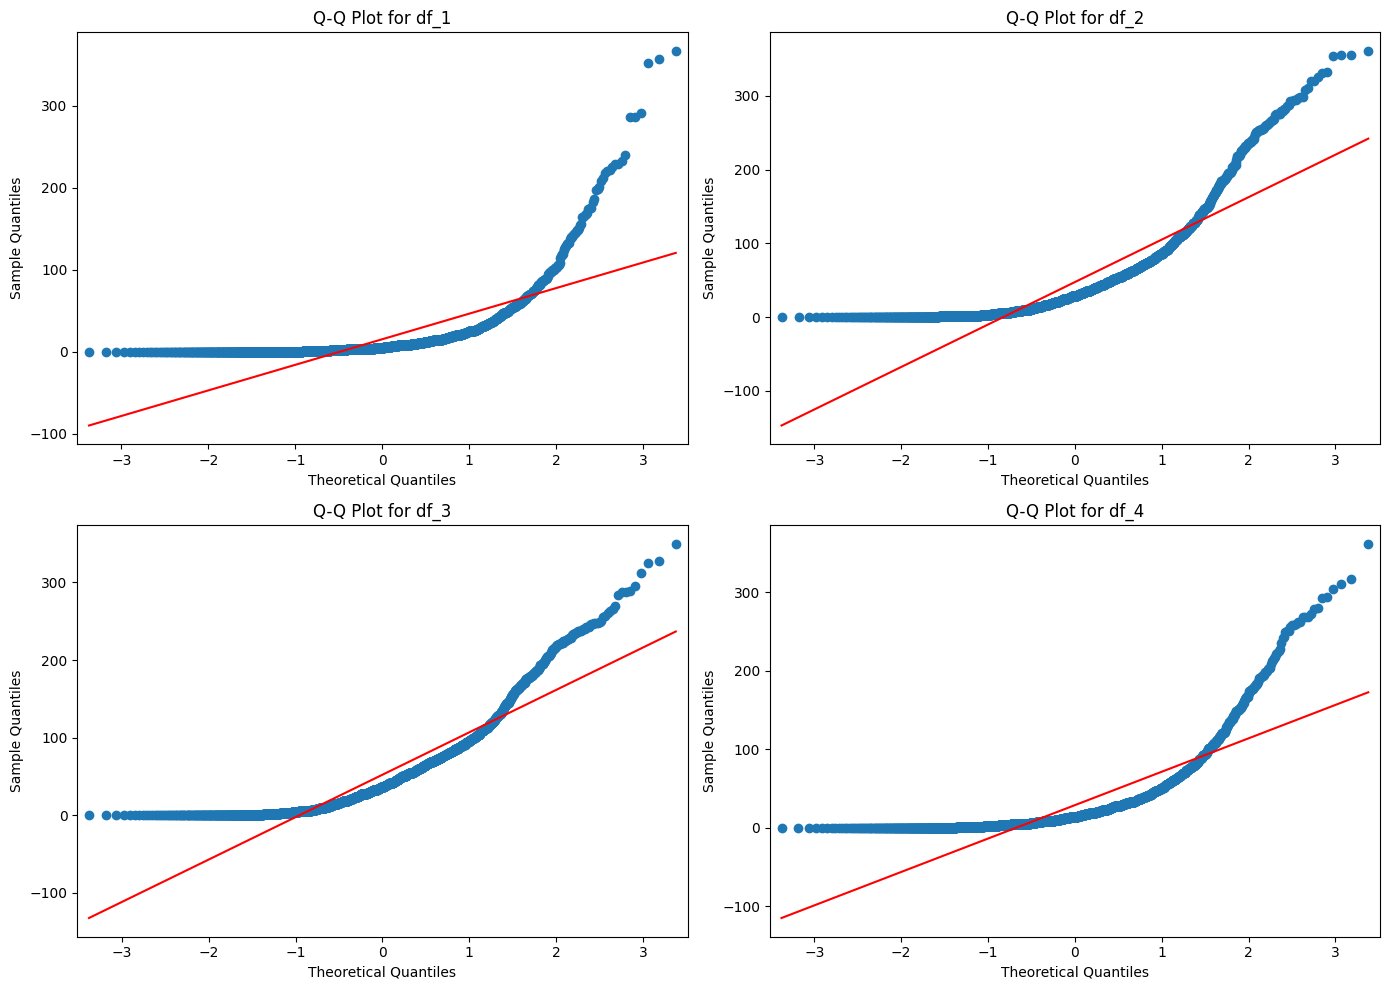

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

qqplot(df_1, line="s", ax=axes[0, 0])
axes[0, 0].set_title("Q-Q Plot for df_1")

qqplot(df_2, line="s", ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot for df_2")

qqplot(df_3, line="s", ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot for df_3")

qqplot(df_4, line="s", ax=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot for df_4")

plt.tight_layout()
plt.show()

## Chi-square test:

In [ ]:
#Chi-Square Test
#H0: Season and Weather are independant
#H1: Season and Weather are dependant

from scipy.stats import chi2_contingency
table = pd.crosstab(df_bike_sharing['weather'], df_bike_sharing['season']) #cross tabulation for analysis.
chi_stat, p_value, df, exp_freq = chi2_contingency(table)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Season and Weather are dependant.")
else:
    print("Fail to reject H0")
    print("Season and Weather are independant.")

#Chi-Squared Test shows that both season and weather are dependant.

chi_stat: 49.15865559689363
p_value: 1.5499250736864862e-07
df: 9
exp_freq: [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Reject H0
Season and Weather are dependant.


In [ ]:
#Chi-Square Test
#H0: Season and Holiday are independant
#H1: Season and Holiday are dependant

table = pd.crosstab(df_bike_sharing['season'], df_bike_sharing['holiday']) #cross tabulation for analysis.
chi_stat, p_value, df, exp_freq = chi2_contingency(table)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Season and Holiday are dependant.")
else:
    print("Fail to reject H0")
    print("Season and Holiday are independant.")


chi_stat: 20.82338817816167
p_value: 0.00011455163312609901
df: 3
exp_freq: [[2609.26419254   76.73580746]
 [2654.92145875   78.07854125]
 [2654.92145875   78.07854125]
 [2655.89288995   78.10711005]]
Reject H0
Season and Holiday are dependant.


In [ ]:
#Chi-Square Test
#H0: Weather and Working Day are independant
#H1: Weather and Working Day are dependant

table = pd.crosstab(df_bike_sharing['weather'], df_bike_sharing['workingday']) #cross tabulation for analysis.
chi_stat, p_value, df, exp_freq = chi2_contingency(table)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Weather and Working Day are dependant.")
else:
    print("Fail to reject H0")
    print("Weather and Working Day are independant.")


chi_stat: 16.16251872527659
p_value: 0.0010502165960627754
df: 3
exp_freq: [[2.29515047e+03 4.89684953e+03]
 [9.04401617e+02 1.92959838e+03]
 [2.74128789e+02 5.84871211e+02]
 [3.19125482e-01 6.80874518e-01]]
Reject H0
Weather and Working Day are dependant.


In [ ]:
#Chi-Square Test
#H0: Holiday and Working Day are independant
#H1: Holiday and Working Day are dependant

table = pd.crosstab(df_bike_sharing['holiday'], df_bike_sharing['workingday']) #cross tabulation for analysis.
chi_stat, p_value, df, exp_freq = chi2_contingency(table)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Holiday and Working Day are dependant.")
else:
    print("Fail to reject H0")
    print("Holiday and Working Day are independant.")

chi_stat: 679.8303606566715
p_value: 7.274717892533614e-150
df: 1
exp_freq: [[3374.75197501 7200.24802499]
 [  99.24802499  211.75197501]]
Reject H0
Holiday and Working Day are dependant.


In [ ]:
#Chi-Square Test
#H0: Season and Working Day are independant
#H1: Season and Working Day are dependant

table = pd.crosstab(df_bike_sharing['workingday'], df_bike_sharing['season']) #cross tabulation for analysis.
chi_stat, p_value, df, exp_freq = chi2_contingency(table)
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Season and Working Day are dependant.")
else:
    print("Fail to reject H0")
    print("Season and Working Day are independant.")

chi_stat: 2.5708953973429574
p_value: 0.4626148207703564
df: 3
exp_freq: [[ 857.17104538  872.16994305  872.16994305  872.48906853]
 [1828.82895462 1860.83005695 1860.83005695 1861.51093147]]
Fail to reject H0
Season and Working Day are independant.


In [ ]:
#Correlation:

correlation = df_bike_sharing[['temp', 'count']].corr()
print(correlation)

           temp     count
temp   1.000000  0.394454
count  0.394454  1.000000


In [ ]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_bike_sharing['temp'], df_bike_sharing['count'])
print("Correlation:", corr)
print("p_value:",p_value)
#Since p-value is essentially 0, this correlation is statistically significant — it's not likely due to random chance.
#moderate positive correlation.

#As temperature increases, the count of bike rentals tends to increase.

Correlation: 0.39445364496724905
p_value: 0.0


In [ ]:
#humidity
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_bike_sharing['humidity'], df_bike_sharing['count'])
print("Correlation:", corr)
print("p_value:",p_value)

#As humidity increases, the count of bike rentals tends to decrease.

Correlation: -0.31737147887659456
p_value: 2.921541663741126e-253


In [ ]:
#registered
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_bike_sharing['temp'], df_bike_sharing['registered'])
print("Correlation:", corr)
print("p_value:",p_value)

#As temperature increases, the count of bike rentals (registered) tends to increase.

Correlation: 0.31857128033739146
p_value: 2.869679150811568e-255


In [ ]:
#correlation b/w humidty and registed count
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_bike_sharing['humidity'], df_bike_sharing['registered'])
print("Correlation:", corr)
print("p_value:",p_value)

#As humidity increases, the count of bike rentals (registered) tends to decreases.

Correlation: -0.26545786846975683
p_value: 5.673986008573091e-175


In [ ]:
#casual
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_bike_sharing['humidity'], df_bike_sharing['casual'])
print("Correlation:", corr)
print("p_value:",p_value)

#As humidity increases, the count of bike rentals (casual) tends to decreases.

Correlation: -0.34818689928736507
p_value: 7.930895264725533e-308


In [ ]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df_bike_sharing['temp'], df_bike_sharing['casual'])
print("Correlation:", corr)
print("p_value:",p_value)

#As temperature increases, the count of bike rentals (casual) tends to increases.

Correlation: 0.46709706412013285
p_value: 0.0


Text(0.5, 1.0, 'Correlation between features')

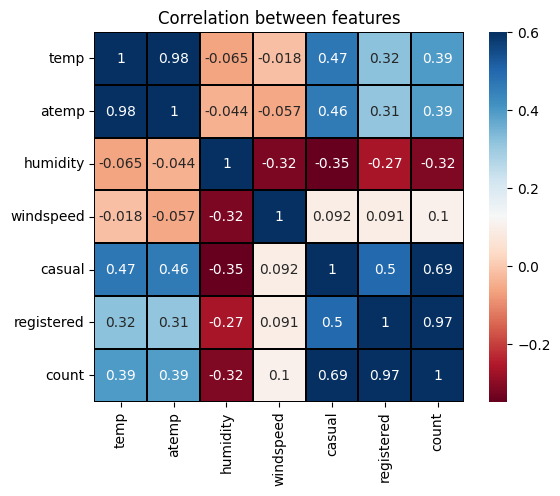

In [ ]:
#overall Correlation b/w variables.
#Showing their correlation strength.

correlation_values = df_bike_sharing[['temp', 'atemp', 'humidity', 'windspeed','casual','registered', 'count']].corr(method = 'pearson')
sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black")
plt.title('Correlation between features')

**Based on correlation analysis, temperature shows a positive correlation with rental count, suggesting that demand tends to increase as temperature rises. Conversely, humidity exhibits a negative correlation, indicating that higher humidity levels may reduce demand. Therefore, both temperature and humidity are relevant factors affecting the demand for shared electric cycles in the Indian market.**

#  Method/Insgihts/Recommendations

**Yulu Case Study:**

**Method:**


*   The Entire dataset was loaded.

*   Check for null values, outliers, described the data set, collected info (type) of the dataset. Shape
and overview of the data set was also performed.

*   EDA was done. value counts,unique values etc were done (kindly refer the pdf). Graphical
Analysis was also performed. (all necessary plots were plotted).

*   Outlier checks using boxplots. Univariate Analysis, Bivariate Analysis also done and Time Series
Exploration.

*   Normality and Variance (Shapiro-Wilk and Levine Tests) Checks also done.

*   Statistical Hypothesis Testing also done: Two-Sample t-test, Kruskal-Wallis Test (nonparametric ANOVA alternative), Chi-Square Test

*   Correlation Analysis also done to find which features are important for predicting the demand
for electric cycles.

*   Conclusive data driven insights and recommendations were also noted.


**Insights:**

*   No Null Values were present in the dataset

*  The distribution is heavily right tailed with outliers present.

*   The distribution is heavily right tailed

*   Failed the normality tests (used QQ-plot and Shapiro-Wilk Test to confirm).

*   At some tests variances were equal but some tests had their variances not equal (all Recorded).
*   Temperature is positively correlated with rentals.


*   Humidity is negatively correlated with rentals.


*   No significant difference in total count between holidays and non-holidays. But, in granular
level of counts (using registered and casual), it showed a significant difference. The overall
count may have balanced this effect or masked the effect of not showing a significant
difference


*   Casual users increase on holidays and non-working days, while registered users increase on
working days and non-holiday. (Also Recorded).


*   Behavior of casual and registered users are distinct, and separating them allows us to uncover
hidden trends that the total count wouldn't reveal.


*  Seasonality also matters: Peak rentals occur between June and October, suggesting seasonal
influence.


*   Weather and season both significantly affect overall count, casual count and registered count
(used Kruskal Wallis as parametric assumptions failed).


*   . Working day vs count did not show a significant difference in total rentals


*  4. Weather and season, Season and Holiday, Weather and Working Day, Holiday and Working
Day, are not independent, while Season and Working Day are dependent (Chi-square test).


*   Statistically Significant Factors Affecting Demand: Temperature, Humidity, Season, Weather
and Months. Also while overall count masked the effect of significant difference, the granular
level of registered and casual showed a significant difference during the hypothesis test. So
even the distinction of registered and casual also plays a role in the prediction model.

**Recommendations:**


*   Target warmer, drier months, for promotions and service expansion


*   Very low usage in poor weather. Consider discounts during that period of time.


*   Segmented Marketing: Casual users can be targeted on holidays and weekends while
Registered users can be targeted on working days. Possibilities of Casual Users might be tourists
from other country/Sates, use tailored marketing and offers/incentives for casual users. Try
expanding customer base for Registered Users by collaborating with companies, or employees
through referral programs, mails, messages etc.



*   Track weather & temperature forecasts to anticipate and manage demand


